In [1]:
# Importing the library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # visualization library based on matplotlib
from IPython.display import display # Manage multiple output per cell

# Manage UTF-8 issue
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')

In [2]:
# DB Sqlite connection
import sqlite3
db = "./data/db/soccer_predict.sqlite"
conn = sqlite3.connect(db)
cur = conn.cursor()

In [3]:
# Get all prematch
df = pd.read_sql_query("SELECT * FROM pre_matchs ORDER BY INFO_Date ASC;", conn)
df = (df[df.columns.drop(['index'])])

In [4]:
# Remove all game between June (include) and October (include)
df['INFO_Date'] = pd.to_datetime(df['INFO_Date'])
df['INFO_Date'].dt.month
df = df[(df['INFO_Date'].dt.month < 6) | (df['INFO_Date'].dt.month > 10)]

In [5]:
# Removing column where bet for Home Victory is too high or too low
df = df.drop(df[df.INFO_BbAvH < 2].index)
df = df.drop(df[df.INFO_BbAvH > 4].index)
df.shape

(7240, 102)

In [6]:
df.INFO_BbAvH.mean()

2.599959944751381

In [7]:
# Create a INFO_WIN column containing the gain. If bet success it's equal to odd -1, else -1 (lose you bet)
df['INFO_WIN'] = df['INFO_BbAvH']-1
df.loc[df.INFO_FTR != 'H', 'INFO_WIN'] = -1

In [8]:
# Statistic for Home victory odd between 2 and 4
display(plt.show(), 100. * df.INFO_FTR.value_counts() / len(df.INFO_FTR))

None

H    37.113260
A    34.005525
D    28.881215
Name: INFO_FTR, dtype: float64

In [9]:
# How much did you win per match if bet on all
df.INFO_WIN.mean()

-0.06275828729281764

In [10]:
# Prepare the dataset
# Get the X and y
X = pd.get_dummies(df[df.columns.drop(['INFO_AwayTeam', 'INFO_BbAvA', 'INFO_BbAvD', 'INFO_BbAvH', 'INFO_Date', 'INFO_FTAG', 'INFO_FTHG', 'INFO_FTR', 'INFO_HTR', 'INFO_HomeTeam', 'INFO_PSA', 'INFO_PSD', 'INFO_PSH', 'INFO_WIN'])])
y = pd.get_dummies(df)['INFO_FTR_H'].astype('bool_')
win = df['INFO_WIN']

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [12]:
y_train.value_counts()

False    3190
True     1878
Name: INFO_FTR_H, dtype: int64

In [13]:
y_test.value_counts()

False    1363
True      809
Name: INFO_FTR_H, dtype: int64

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [15]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
clf = GaussianNB()
f1_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='f1')
recall = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='recall')
precision = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='precision')
display('f1:',f1_score.mean(), f1_score.std())
display('recall:',recall.mean(), recall.std())
display('precision:',precision.mean(), precision.std())

'f1:'

0.33932235718362136

0.024426895871941166

'recall:'

0.3056480515356349

0.031547854713765748

'precision:'

0.38263733655320553

0.015444211943044885

In [16]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
clf = MLPClassifier(random_state=0)
f1_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='f1')
recall = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='recall')
precision = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='precision')
display('f1:',f1_score.mean(), f1_score.std())
display('recall:',recall.mean(), recall.std())
display('precision:',precision.mean(), precision.std())

'f1:'

0.42723478504185464

0.070844514896374569

'recall:'

0.39874223109377127

0.081634991665294518

'precision:'

0.46230209217667956

0.056700247520781157

In [17]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
clf = AdaBoostClassifier(random_state=0)
f1_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='f1')
recall = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='recall')
precision = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='precision')
display('f1:',f1_score.mean(), f1_score.std())
display('recall:',recall.mean(), recall.std())
display('precision:',precision.mean(), precision.std())

'f1:'

0.22078220039258986

0.014393306872750757

'recall:'

0.14802998684389604

0.010481575446572428

'precision:'

0.43770645003324038

0.042632062187664813

In [32]:
# SVC Classifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
clf = SVC(random_state=0)
f1_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='f1')
recall = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='recall')
precision = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='precision')
display('f1:',f1_score.mean(), f1_score.std())
display('recall:',recall.mean(), recall.std())
display('precision:',precision.mean(), precision.std())

'f1:'

0.0

0.0

'recall:'

0.0

0.0

'precision:'

0.0

0.0

In [19]:
# KNeighborsClassifier Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier()
f1_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='f1')
recall = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='recall')
precision = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='precision')
display('f1:',f1_score.mean(), f1_score.std())
display('recall:',recall.mean(), recall.std())
display('precision:',precision.mean(), precision.std())

'f1:'

0.34082395740682275

0.016437956694809696

'recall:'

0.29554620514449031

0.01802843196528885

'precision:'

0.40273111044965515

0.012834006677546835

In [20]:
# Gaussian Process Classifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import cross_val_score
clf = GaussianProcessClassifier(random_state=0)
f1_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='f1')
recall = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='recall')
precision = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='precision')
display('f1:',f1_score.mean(), f1_score.std())
display('recall:',recall.mean(), recall.std())
display('precision:',precision.mean(), precision.std())

'f1:'

0.48833746542684925

0.010166957473838162

'recall:'

0.48829333575284672

0.010929260674685708

'precision:'

0.48866403482880749

0.015165370304714137

In [34]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, n_estimators=100)
f1_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='f1')
recall = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='recall')
precision = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='precision')
display('f1:',f1_score.mean(), f1_score.std())
display('recall:',recall.mean(), recall.std())
display('precision:',precision.mean(), precision.std())

'f1:'

0.35744597645518172

0.0029349079806467848

'recall:'

0.2316256861588713

0.0044137492861943692

'precision:'

0.78659016500356793

0.050769099667884135

In [21]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
f1_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='f1')
recall = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='recall')
precision = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=4, n_jobs=-1, scoring='precision')
display('f1:',f1_score.mean(), f1_score.std())
display('recall:',recall.mean(), recall.std())
display('precision:',precision.mean(), precision.std())

'f1:'

0.48187070706733548

0.010605743251687626

'recall:'

0.49094043460509007

0.021237596858207926

'precision:'

0.47353372222092671

0.0030925304702370052

In [22]:
# Fit data with the best Classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [23]:
# Predicting the Test set result
y_pred = clf.predict(X_test)
y_pred

array([False, False,  True, ..., False, False,  True], dtype=bool)

In [24]:
# Calculate target classification probability (got % instead of 1 or 0)
y_probs = clf.predict_proba(X_test)
y_probs

array([[ 0.69786981,  0.30213019],
       [ 0.82171371,  0.17828629],
       [ 0.23984449,  0.76015551],
       ..., 
       [ 0.65433361,  0.34566639],
       [ 0.8520586 ,  0.1479414 ],
       [ 0.42465019,  0.57534981]])

In [25]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary') 

(0.43189368770764119, 0.32138442521631644, 0.36853295535081504, None)

In [26]:
# Making the confusion Matrix
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,False,True,All
Actual,,,
False,1021,342,1363
True,549,260,809
All,1570,602,2172


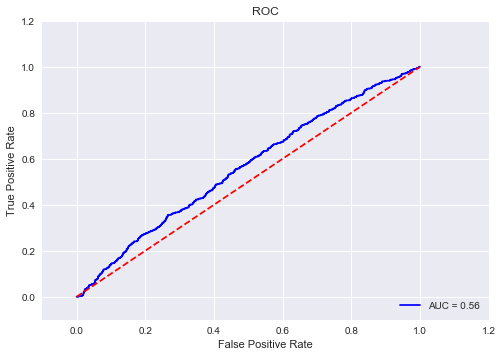

In [27]:
# Plot of a ROC curve
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.ravel(), y_probs[:, 1].ravel())
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
X_pred = clf.predict(X)
df['pred'] = X_pred
df_bet_home = df.drop(df[df.pred == 0].index)

In [29]:
display(plt.show(), 100. * df_bet_home.INFO_FTR.value_counts() / len(df_bet_home.INFO_FTR))

None

H    37.145289
A    33.839387
D    29.015323
Name: INFO_FTR, dtype: float64

In [30]:
df_bet_home.INFO_WIN.mean()

-0.06307321225879678

In [36]:
X.dtypes

A_FIVE_AC        float64
A_FIVE_AF        float64
A_FIVE_AR        float64
A_FIVE_AS        float64
A_FIVE_AST       float64
A_FIVE_AY        float64
A_FIVE_FTAG      float64
A_FIVE_FTHG      float64
A_FIVE_FTR_A     float64
A_FIVE_FTR_D     float64
A_FIVE_FTR_H     float64
A_FIVE_HC        float64
A_FIVE_HF        float64
A_FIVE_HR        float64
A_FIVE_HS        float64
A_FIVE_HST       float64
A_FIVE_HTAG      float64
A_FIVE_HTHG      float64
A_FIVE_HTR_A     float64
A_FIVE_HTR_D     float64
A_FIVE_HTR_H     float64
A_FIVE_HY        float64
A_THREE_AC       float64
A_THREE_AF       float64
A_THREE_AR       float64
A_THREE_AS       float64
A_THREE_AST      float64
A_THREE_AY       float64
A_THREE_FTAG     float64
A_THREE_FTHG     float64
                  ...   
H_THREE_AC       float64
H_THREE_AF       float64
H_THREE_AR       float64
H_THREE_AS       float64
H_THREE_AST      float64
H_THREE_AY       float64
H_THREE_FTAG     float64
H_THREE_FTHG     float64
H_THREE_FTR_A    float64
